## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [3]:
thyroid_data = pd.read_csv('New_Thyroid_dataset.csv')

In [4]:
#Check first five row
thyroid_data.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,...,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,0,0,0,0,0,0,0,0,0,0,...,1,1,80,1,1.4,0.8,105.0,0.88,120.0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,74,0,0.0,0.7,98.0,0.81,121.0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,32,0,1.4,1.1,121.0,1.11,109.0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,42,0,2.3,1.1,93.0,0.73,127.0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,89,1,0.8,0.8,111.0,0.68,165.0,1


## Analyzing Data

<AxesSubplot:xlabel='classes', ylabel='count'>

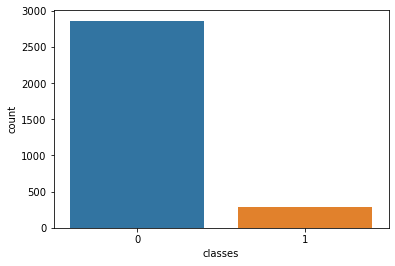

In [5]:
sns.countplot(x="classes", data=thyroid_data)

<AxesSubplot:xlabel='classes', ylabel='count'>

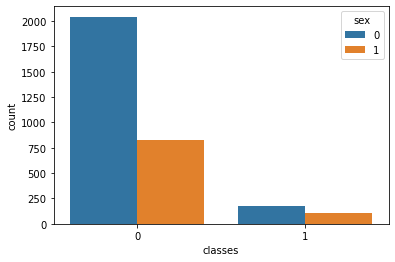

In [6]:
sns.countplot(x="classes", hue="sex", data=
              thyroid_data)

<AxesSubplot:xlabel='classes', ylabel='count'>

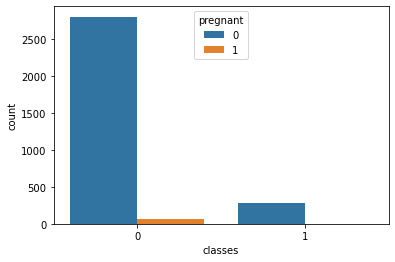

In [11]:
sns.countplot(x="classes", hue="pregnant", data=thyroid_data)

<AxesSubplot:xlabel='classes', ylabel='count'>

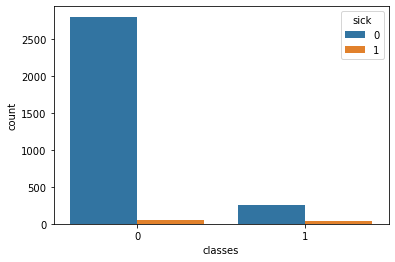

In [12]:
sns.countplot(x="classes", hue="sick", data=thyroid_data)

<AxesSubplot:xlabel='classes', ylabel='count'>

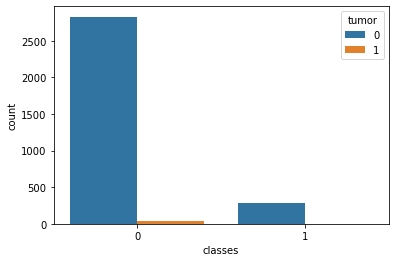

In [10]:
sns.countplot(x="classes", hue="tumor", data=thyroid_data)

<AxesSubplot:xlabel='classes', ylabel='count'>

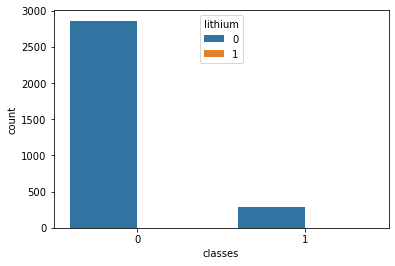

In [11]:
sns.countplot(x="classes", hue="lithium", data=thyroid_data)

<AxesSubplot:ylabel='Frequency'>

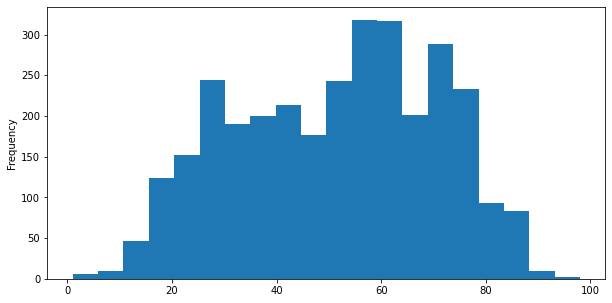

In [12]:
thyroid_data["age"].plot.hist(bins=20,figsize=(10,5))

In [13]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   on_thyroxine               3152 non-null   int64  
 1   query_on_thyroxine         3152 non-null   int64  
 2   on_antithyroid_medication  3152 non-null   int64  
 3   thyroid_surgery            3152 non-null   int64  
 4   query_hypothyroid          3152 non-null   int64  
 5   query_hyperthyroid         3152 non-null   int64  
 6   pregnant                   3152 non-null   int64  
 7   sick                       3152 non-null   int64  
 8   tumor                      3152 non-null   int64  
 9   lithium                    3152 non-null   int64  
 10  goitre                     3152 non-null   int64  
 11  TSH_measured               3152 non-null   int64  
 12  T3_measured                3152 non-null   int64  
 13  TT4_measured               3152 non-null   int64

## Data Wrangling

In [14]:
#To check null values in data
#False means not null and True means NULL
thyroid_data.isnull()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,...,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
thyroid_data.isnull().sum()

on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
age                          0
sex                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
classes                      0
dtype: int64

<AxesSubplot:>

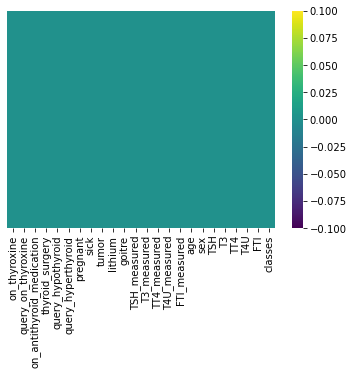

In [16]:
#To check null and not null values in a graph
sns.heatmap(thyroid_data.isnull(), yticklabels=False, cmap="viridis")

## Train Data & Test Data

In [17]:
X=thyroid_data.drop("classes",axis=1)
Y=thyroid_data["classes"]

In [18]:
#Split data into training and testing subset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3,random_state=1)


In [19]:
#Creating a model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()#object of the class

In [20]:
logmodel.fit(X_train, Y_train)#Training the model

LogisticRegression()

In [21]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       854
           1       0.53      0.38      0.44        92

    accuracy                           0.91       946
   macro avg       0.73      0.67      0.70       946
weighted avg       0.90      0.91      0.90       946



## Accuracy Check

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[823,  31],
       [ 57,  35]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)*100

95.03171247357294

In [25]:
cm= np.array(confusion_matrix(Y_test, predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Thyroid ','is healthy'],columns =['predicted thyroid', 'predicted healthy'])
confusion

,predicted thyroid,predicted healthy
is Thyroid,60,32
is healthy,15,839


(array([0.5, 1.5]), [Text(0, 0.5, 'is Thyroid '), Text(0, 1.5, 'is healthy')])

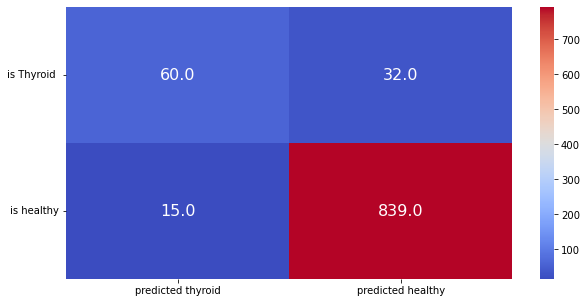

In [30]:
#Font size can be passed with annot_kws
#The format of the annotation can be changed with fmt – here I’ll change from the default scientific notation to one decimal precision
plt.subplots(figsize=(10,5))
sns.heatmap(confusion,annot=True,cmap="coolwarm" ,fmt=".1f" ,annot_kws={'size':16}, robust=True)
plt.yticks(rotation = 0)


Feature: 0, Score: -1.25468
Feature: 1, Score: -0.22549
Feature: 2, Score: 0.10638
Feature: 3, Score: -0.15597
Feature: 4, Score: -0.48770
Feature: 5, Score: -0.06864
Feature: 6, Score: -0.07180
Feature: 7, Score: 0.64854
Feature: 8, Score: 0.20460
Feature: 9, Score: -0.00507
Feature: 10, Score: -0.10908
Feature: 11, Score: 0.78870
Feature: 12, Score: 2.28538
Feature: 13, Score: 0.42939
Feature: 14, Score: 0.42687
Feature: 15, Score: 0.42687
Feature: 16, Score: 0.00191
Feature: 17, Score: -0.03359
Feature: 18, Score: -0.08892
Feature: 19, Score: -4.46715
Feature: 20, Score: 0.02763
Feature: 21, Score: -1.05030
Feature: 22, Score: -0.01122


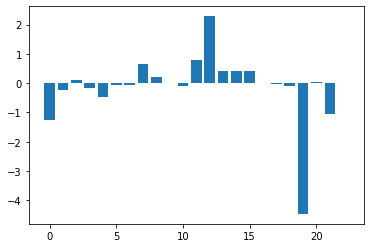

In [31]:
# get importance
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
# Selecting only the most contributed Features and Dropping other features
X=thyroid_data.drop(['classes','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
'query_hyperthyroid','pregnant','tumor','lithium','goitre','TT4_measured','T4U_measured','FTI_measured','age','sex','TSH','TT4','FTI'],axis=1)
y=thyroid_data["classes"]

In [33]:
X

,on_thyroxine,sick,TSH_measured,T3_measured,T3,T4U
0,0,0,1,1,0.8,0.88
1,0,0,1,1,0.7,0.81
2,0,0,1,1,1.1,1.11
3,0,0,1,1,1.1,0.73
4,0,0,1,1,0.8,0.68
...,...,...,...,...,...,...
3147,0,0,1,1,3.1,1.40
3148,1,0,0,0,2.0,1.01
3149,0,0,1,1,1.7,1.03
3150,1,0,1,1,1.1,1.07


In [34]:
#Split data into training and testing subset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3,random_state=1)

In [35]:
#Creating a model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       854\n           1       0.53      0.38      0.44        92\n\n    accuracy                           0.91       946\n   macro avg       0.73      0.67      0.70       946\nweighted avg       0.90      0.91      0.90       946\n'

In [38]:
#Accuracy Check
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[823,  31],
       [ 57,  35]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)*100

90.69767441860465

In [40]:
cm= np.array(confusion_matrix(Y_test, predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Thyroid ','is healthy'],columns =['predicted thyroid', 'predicted healthy'])
confusion

,predicted thyroid,predicted healthy
is Thyroid,35,57
is healthy,31,823
